In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, recall_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Impact_of_Remote_Work_on_Mental_Health.csv'
data = pd.read_csv(file_path)

data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

(  Employee_ID  Age      Gender           Job_Role    Industry  \
 0     EMP0001   32  Non-binary                 HR  Healthcare   
 1     EMP0002   40      Female     Data Scientist          IT   
 2     EMP0003   59  Non-binary  Software Engineer   Education   
 3     EMP0004   27        Male  Software Engineer     Finance   
 4     EMP0005   49        Male              Sales  Consulting   
 
    Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
 0                   13        Hybrid                     47   
 1                    3        Remote                     52   
 2                   22        Hybrid                     46   
 3                   20        Onsite                     32   
 4                   32        Onsite                     35   
 
    Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
 0                           7                         2       Medium   
 1                           4                         1       Medium 

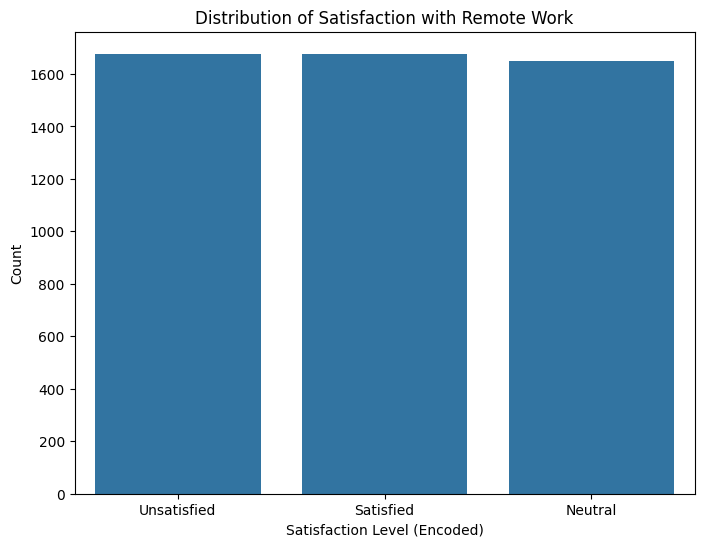

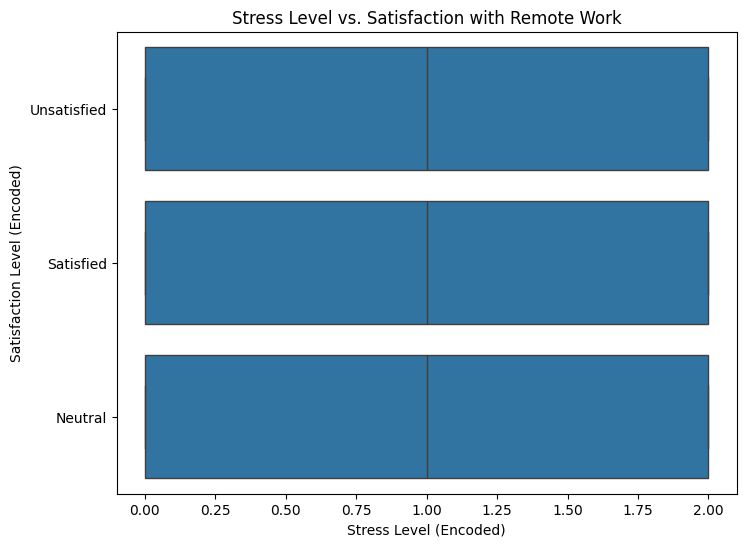

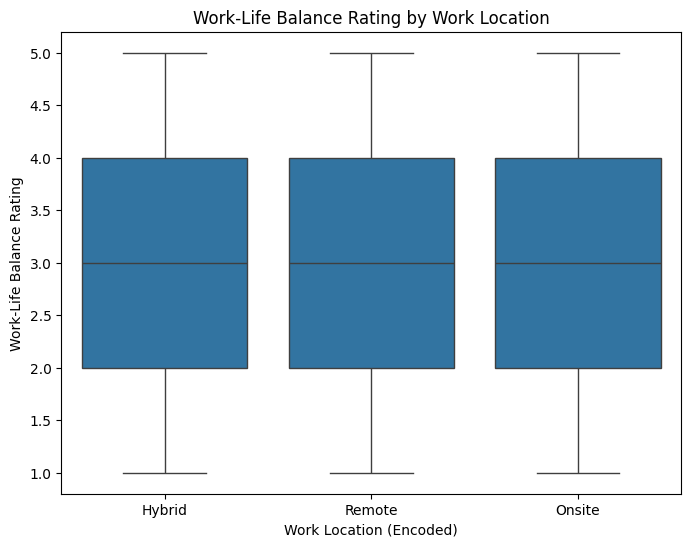

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Distribution of Satisfaction with Remote Work
plt.figure(figsize=(8, 6))
sns.countplot(data, x="Satisfaction_with_Remote_Work")
plt.title("Distribution of Satisfaction with Remote Work")
plt.xlabel("Satisfaction Level (Encoded)")
plt.ylabel("Count")
plt.show()

# Plot 2: Relationship between Stress Level and Satisfaction with Remote Work
plt.figure(figsize=(8, 6))
sns.boxplot(data, x="Stress_Level", y="Satisfaction_with_Remote_Work")
plt.title("Stress Level vs. Satisfaction with Remote Work")
plt.xlabel("Stress Level (Encoded)")
plt.ylabel("Satisfaction Level (Encoded)")
plt.show()

# Plot 3: Work-Life Balance Rating across Work Locations
plt.figure(figsize=(8, 6))
sns.boxplot(data, x="Work_Location", y="Work_Life_Balance_Rating")
plt.title("Work-Life Balance Rating by Work Location")
plt.xlabel("Work Location (Encoded)")
plt.ylabel("Work-Life Balance Rating")
plt.show()


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

features = ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week',
            'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
            'Social_Isolation_Rating', 'Company_Support_for_Remote_Work']
target = 'Stress_Level'

# Encode categorical target variable (Low, Medium, High) to numerical values
label_encoder = LabelEncoder()
data[target] = label_encoder.fit_transform(data[target])


X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

LogReg = LogisticRegression()

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)


In [7]:
print('Classes', LogReg.classes_)
print('Intercept', LogReg.intercept_)
print('Coefficients', LogReg.coef_)

Classes [0 1 2]
Intercept [-0.00046011 -0.01138441  0.01184453]
Coefficients [[ 0.02572154  0.01383648  0.01515555 -0.00791828  0.03459779  0.04503276
  -0.01037663]
 [-0.00664899 -0.03340271 -0.01832019  0.01249355 -0.00362438 -0.04209772
   0.01665695]
 [-0.01907256  0.01956622  0.00316463 -0.00457527 -0.03097342 -0.00293504
  -0.00628032]]


In [8]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.344
              precision    recall  f1-score   support

           0       0.36      0.39      0.38       436
           1       0.32      0.26      0.29       409
           2       0.35      0.38      0.36       405

    accuracy                           0.34      1250
   macro avg       0.34      0.34      0.34      1250
weighted avg       0.34      0.34      0.34      1250



In [9]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[172, 121, 143],
       [158, 106, 145],
       [146, 107, 152]])

In [14]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

target_names = ['High', 'Low', 'Medium']  # Based on the mapping in label_encoder

# One-vs-All
ova_model = OneVsRestClassifier(LogisticRegression(random_state=42, max_iter=1000))
ova_model.fit(X_train, y_train)
y_pred_ova = ova_model.predict(X_test)

# Evaluate OvA
accuracy_ova = accuracy_score(y_test, y_pred_ova)
report_ova = classification_report(y_test, y_pred_ova, target_names=target_names)

print("One-vs-All (OvA) Results:")
print("Accuracy:", accuracy_ova)
print("Classification Report:")
print(report_ova)

# One-vs-One
ovo_model = OneVsOneClassifier(LogisticRegression(random_state=42, max_iter=1000))
ovo_model.fit(X_train, y_train)
y_pred_ovo = ovo_model.predict(X_test)

# Evaluate OvO
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)
report_ovo = classification_report(y_test, y_pred_ovo, target_names=target_names)

print("All-vs-One (OvO) Results:")
print("Accuracy:", accuracy_ovo)
print("Classification Report:")
print(report_ovo)



One-vs-All (OvA) Results:
Accuracy: 0.3432
Classification Report:
              precision    recall  f1-score   support

        High       0.36      0.39      0.38       436
         Low       0.32      0.26      0.29       409
      Medium       0.34      0.37      0.36       405

    accuracy                           0.34      1250
   macro avg       0.34      0.34      0.34      1250
weighted avg       0.34      0.34      0.34      1250

All-vs-One (OvO) Results:
Accuracy: 0.34
Classification Report:
              precision    recall  f1-score   support

        High       0.36      0.39      0.37       436
         Low       0.32      0.27      0.29       409
      Medium       0.34      0.36      0.35       405

    accuracy                           0.34      1250
   macro avg       0.34      0.34      0.34      1250
weighted avg       0.34      0.34      0.34      1250

